In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
##IMPORT
df=pd.read_excel(r'C:\Users\Vignesh\Desktop\PYTHON FILE\new project\data\1-2017.xlsx')
print("{:,} order lines for {:,}orders".format(len(df),df.ORDER_NUMBER.nunique()))
df.head()

144,339 order lines for 59,372orders


,DATE FORMAT,ORDER_NUMBER,SKU,BOX
0,2017-01-01,835220,290731,1.0
1,2017-01-01,835220,373272,1.0
2,2017-01-01,835214,362101,1.0
3,2017-01-01,835215,215515,1.0
4,2017-01-01,835215,287995,1.0


In [6]:
#STOCK-KEEPING-UNITS

df_par=pd.DataFrame(df.groupby(['SKU'])['BOX'].sum())
df_par.columns=['BOX']

#Sortvalues
df_par.sort_values(['BOX'],ascending=False,inplace=True)
df_par.reset_index(inplace=True)

#Cumulativesum
df_par['CumSum']=df_par['BOX'].cumsum()


#%Cumsum
df_par['%CumSum']=(100*df_par['CumSum']/df_par['BOX'].sum())


##%SKU

df_par['%SKU']=(100*(df_par.index+1).astype(float)/(df_par.index.max()+1))


#> 80% volume
df_par80=df_par[df_par['%CumSum']>80].copy()
perc_sku80=df_par80['%SKU'].min()
perc_sum80=df_par80['%CumSum'].min()

##20% SKU
df_sku20=df_par[df_par['%SKU']>20].copy()
perc_sku20=df_sku20['%SKU'].min()
perc_sum20=df_sku20['%CumSum'].min()

##10%SKU
df_sku5=df_par[df_par['%SKU']>5].copy()
perc_sku5=df_sku5['%SKU'].min()
perc_sum5=df_sku5['%CumSum'].min()

print("Paretto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.head()

Paretto Analysis for 4,864 unique SKU


,SKU,BOX,CumSum,%CumSum,%SKU
0,359803,4810.0,4810.0,2.911658,0.020559
1,290478,4132.0,8942.0,5.412898,0.041118
2,366639,4104.0,13046.0,7.897190,0.061678
3,359958,4062.0,17108.0,10.356058,0.082237
4,253500,3879.0,20987.0,12.704149,0.102796


In [7]:
df_par.tail()

,SKU,BOX,CumSum,%CumSum,%SKU
4859,299866,1.0,165194.0,99.997579,99.917763
4860,299636,1.0,165195.0,99.998184,99.938322
4861,299631,1.0,165196.0,99.998789,99.958882
4862,299630,1.0,165197.0,99.999395,99.979441
4863,1189,1.0,165198.0,100.000000,100.000000


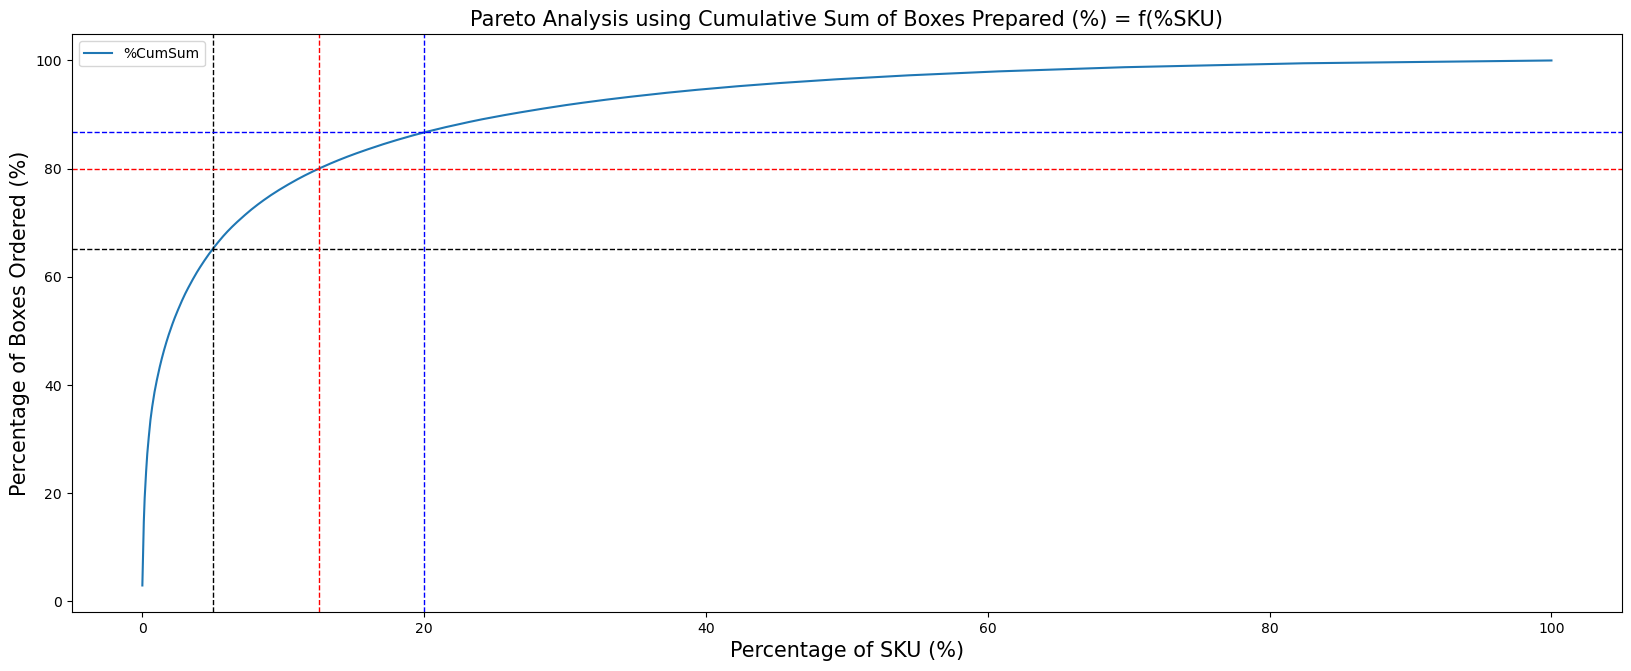

In [8]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)
# 5% SKU
ax.axhline(perc_sum5 , color="black", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku5, color="black", linestyle="--", linewidth = 1.0)
# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)
# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)
plt.show()